In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np 
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from config import db_password
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(Path('../Resources/Covid_TravelData_Full.csv'))
df.head()

,date,year,monthnumber,month,mm_yyyy,daynumber,newcases,totalcases,newdeaths,totalvaccinations,peoplevaccinated,peoplefullyvaccinated,newvaccinations,numberofpassengers
0,2020-01-01,2020,1,January,Jan-20,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2178656
1,2020-01-02,2020,1,January,Jan-20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2422272
2,2020-01-03,2020,1,January,Jan-20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2210542
3,2020-01-04,2020,1,January,Jan-20,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1806480
4,2020-01-05,2020,1,January,Jan-20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1815040


In [3]:
# fill the Nan with 0
df = df.fillna(0)
df.head()

,date,year,monthnumber,month,mm_yyyy,daynumber,newcases,totalcases,newdeaths,totalvaccinations,peoplevaccinated,peoplefullyvaccinated,newvaccinations,numberofpassengers
0,2020-01-01,2020,1,January,Jan-20,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2178656
1,2020-01-02,2020,1,January,Jan-20,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2422272
2,2020-01-03,2020,1,January,Jan-20,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2210542
3,2020-01-04,2020,1,January,Jan-20,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1806480
4,2020-01-05,2020,1,January,Jan-20,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1815040


## Linear Regression

In [4]:
y = df['numberofpassengers']
X = df.drop(columns=["numberofpassengers", "date", "year", "monthnumber", "month", "mm_yyyy", "daynumber"])
X.head()

,newcases,totalcases,newdeaths,totalvaccinations,peoplevaccinated,peoplefullyvaccinated,newvaccinations
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

X_train.shape

(668, 7)

In [6]:
len(X_test)

223

In [7]:
len(y_test)

223

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test_scaled)
model_pred = y_pred
model_pred

array([2250867.94535217,  859281.96523524,  972045.05112415,
       2061348.3698166 , 1932877.4535275 , 1490202.12250493,
        815777.32605791, 1050253.14144647, 1050253.28706752,
        899905.25129976, 2163674.29458872, 1050253.14144647,
       1050253.14144647, 1050253.14144647,  906350.28476635,
       1092927.65467912, 1998721.20544537, 1563063.21901806,
        888333.39108446, 1216859.47927925,  739487.29904243,
       1048588.80449704, 1996294.19875073,  347572.64029621,
        476574.77936589, 2113125.56858492, 1489968.96406226,
       2220683.44031038, 1904936.65265165, 1862452.67669724,
       2105205.74223127, 1055438.63688021, 1396955.29265287,
       1772219.53001453, 1876354.05062085,  863881.01182943,
       1608582.97992905,  835894.81589099,  486193.87240606,
       1978083.49945581,  812986.27888048, 1050253.14144647,
       2238032.48990006,  844221.53938449, 2099364.72873231,
        489155.05800772, 1050018.16475714, 2172445.2769182 ,
       1597332.89467957,

In [11]:
# Create the DF for Prediction and Actual values
predictions_df = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
predictions_df.head(10)

,Prediction,Actual
862,2.250868e+06,2327671
223,8.592820e+05,590749
84,9.720451e+05,184027
680,2.061348e+06,2064753
535,1.932877e+06,1882381
623,1.490202e+06,1455913
148,8.157773e+05,352947
3,1.050253e+06,1806480
34,1.050253e+06,2271551
241,8.999053e+05,807695


In [12]:
# Saving predictions_df 
predictions_df.to_csv("../Resources/PredDF_LR.csv", index=False)

In [13]:
# accuracy score
model_score = r2_score(y_test,y_pred)
print('linear regression r2 score is', model_score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

linear regression r2 score is 0.6132624442816819
mean_squared_error is == 171889109661.1699
root_mean_squared error is == 414595.11533684266


### Correlation Matrix


In [14]:
# Correlation Matrix of total covid cases and number of passengers.
r1 = np.corrcoef(X.totalcases,y)
r1

array([[1.        , 0.62958704],
       [0.62958704, 1.        ]])

In [15]:
# Correlation Matrix of total vaccinations and number of passengers.
r2 = np.corrcoef(X.totalvaccinations,y)
r2

array([[1.        , 0.70755578],
       [0.70755578, 1.        ]])

In [16]:
# Correlation Matrix of people fully vaccinated and number of passengers.
r3 = np.corrcoef(X.peoplefullyvaccinated,y)
r3

array([[1.        , 0.71984721],
       [0.71984721, 1.        ]])

In [17]:
# Correlation Matrix of new covid cases and number of passengers.
r4 = np.corrcoef(X.newcases,y)
r4

array([[1.        , 0.02317779],
       [0.02317779, 1.        ]])

## Random Forest Classifier Model

In [18]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model

RandomForestClassifier(random_state=0)

In [20]:
# Evaluate the model
y_pred_RF = rf_model.predict(X_test_scaled)
print(rf_model.predict(X_test_scaled))

[2352035  831789  199644 1559772 2030577 1820152  264843 2155747 1948138
  578131 1990954 2155747 2155747 2155747 1192881  744812 1736292 1728383
  711124 1146539  701709 1257823 2040364  567401  114459 2196867 1728383
 1979713 1545955 1459054 2213168  662484 1465197 2017937 2028961  764468
 1854534  419675  874406 2100167  683212 2155747 2350927  501513 1978691
  874406 2198517 2288800 1533544 2293242  764761 1814047  540043  784746
  279018  190477  523186 1672895 2155747  864783  625235 1900738 2275133
  625235 2118528  873038 1672895  761861  724770  866679 1871986 2044545
 1738406 1449698 1782705 1736292  542338 1738406 1369410 1820433 1618169
  386969 1510829  724770 1369410 2062579 1761348 1945026 1962056 1995747
 1626185 1811767 2068792 1814047 2036479 1267345   94931 2155747 2379860
 2096466 1785846 1946502 2119867 1660506 1070967 1066747  118302 1190682
 1814047  552024 2114166 2167857 1510829  659350 1666715 1979089  119629
 1992577 1879885 1844208  744812  772380   93645 10

In [21]:
# create the dataframe for Prediction and Actual values
predictions_RF = pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test})
predictions_RF.head(10)

,Prediction,Actual
862,2352035,2327671
223,831789,590749
84,199644,184027
680,1559772,2064753
535,2030577,1882381
623,1820152,1455913
148,264843,352947
3,2155747,1806480
34,1948138,2271551
241,578131,807695


In [22]:
# Saving predictions_df 
predictions_RF.to_csv("../Resources/Predictions_RF.csv", index=False)

In [23]:
# accuracy score
model_rf_score = r2_score(predictions_RF.Actual, predictions_RF.Prediction)
print('r2 score is', model_rf_score)
print("mean_squared_error is ==",mean_squared_error(predictions_RF.Actual, predictions_RF.Prediction))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(predictions_RF.Actual, predictions_RF.Prediction)))

r2 score is 0.8588100391688871
mean_squared_error is == 62753193480.98655
root_mean_squared error is == 250505.87514265318


Random Forest Model has the a R-squared value of 85%. This means that Random Forest Model is better in prediction when compared to the Linear Regression Model whith an accuracy score of 61%.

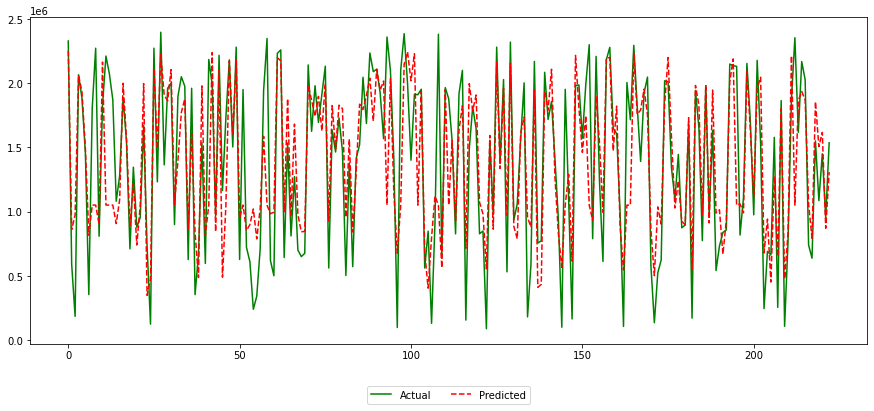

In [24]:
# plotting the actual and the predicted values for Linear model
plt.rcParams['figure.figsize'] = (15,6)
x_axes = range(len(X_test))
# plotting
plt.plot(x_axes, y_test, label = 'Actual', color = 'g', linestyle = '-')
plt.plot(x_axes, y_pred, label = 'Predicted', color = 'r', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = True)
plt.show()

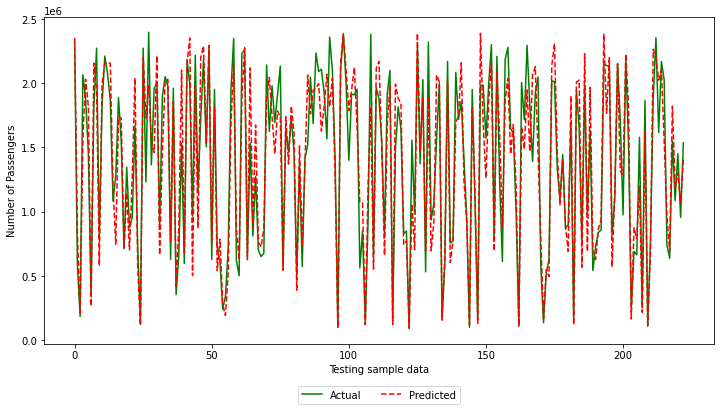

In [25]:
# plotting the actual and the predicted values for Random Forest
plt.rcParams['figure.figsize'] = (12,6)
x_axes = range(len(X_test))
# plotting
plt.plot(x_axes, y_test, label = 'Actual', color = 'g', linestyle = '-')
plt.plot(x_axes, y_pred_RF, label = 'Predicted', color = 'r', linestyle = '--')
plt.ylabel('Number of Passengers')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = True)
plt.show()